<a href="https://colab.research.google.com/github/masoudshahrian/DataScience-code/blob/master/Read_CSV_data_and_analyse_with_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import r2_score
import pickle


In [3]:
# مرحله 1: بارگذاری و پاک‌سازی داده‌ها
data = pd.read_csv('/content/my_data10.csv')
# data_cleaned = data.dropna()  # حذف ردیف‌های با داده‌های خالی


In [ ]:
data

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import r2_score
import pickle

# مرحله 1: بارگذاری و پاک‌سازی داده‌ها
# بارگذاری داده‌ها از فایل CSV
data = pd.read_csv('/content/my_data10.csv')

# نمایش نام ستون‌ها برای شناسایی ستون هدف
print("نام ستون‌ها:")
print(data.columns)

# نام ستون هدف (خروجی) را مشخص کنید
target_column_name = 'target'  # نام صحیح ستون خروجی را وارد کنید

# بررسی وجود ستون هدف
if target_column_name not in data.columns:
    raise ValueError(f"ستون '{target_column_name}' در داده‌ها وجود ندارد.")

# حذف ردیف‌های با داده‌های خالی
data_cleaned = data.dropna()

# مرحله 2: محاسبه همبستگی
correlation_matrix = data_cleaned.corr()
target_correlation = correlation_matrix[target_column_name].abs().sort_values(ascending=False)

# چاپ همبستگی‌ها
print("همبستگی بین ویژگی‌ها و خروجی:")
print(target_correlation)

# انتخاب پارامترهای مهم (با آستانه پایین‌تر)
important_features = target_correlation[target_correlation > 0.2].index.tolist()  # آستانه 0.2
important_features.remove(target_column_name)  # حذف ستون هدف از ویژگی‌ها

print("پارامترهای مهم:")
print(important_features)

# بررسی اینکه آیا ویژگی‌های مهم وجود دارد
if len(important_features) == 0:
    raise ValueError("هیچ ویژگی مهمی برای مدل وجود ندارد.")

# مرحله 3: تقسیم داده‌ها
X = data_cleaned[important_features]  # ورودی‌ها
y = data_cleaned[target_column_name]  # خروجی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل درخت تصمیم
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی و محاسبه R²
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

if r2 > 0.75:
    print(f'R²: {r2} - مدل موفق است.')

    # مرحله 4: استخراج رابطه
    tree_rules = export_text(model, feature_names=list(X.columns))
    print("قوانین درخت تصمیم:")
    print(tree_rules)

    # ذخیره مدل
    with open('decision_tree_model.pkl', 'wb') as file:
        pickle.dump(model, file)
else:
    print(f'R²: {r2} - مدل نیاز به بهبود دارد.')

نام ستون‌ها:
Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'target'],
      dtype='object')
همبستگی بین ویژگی‌ها و خروجی:
target       1.000000
feature5     0.316375
feature18    0.184349
feature14    0.176963
feature16    0.151777
feature17    0.151777
feature12    0.148044
feature7     0.113013
feature11    0.108649
feature15    0.103262
feature10    0.101930
feature13    0.087286
feature8     0.086045
feature4     0.064139
feature3     0.035998
feature9     0.029226
feature1     0.013248
feature6     0.003696
feature2     0.000587
Name: target, dtype: float64
پارامترهای مهم:
['feature5']
R²: -0.7259471868870035 - مدل نیاز به بهبود دارد.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle

# مرحله 1: بارگذاری و پاک‌سازی داده‌ها
# بارگذاری داده‌ها از فایل CSV
data = pd.read_csv('/content/my_data10.csv')

# نمایش نام ستون‌ها برای شناسایی ستون هدف
print("نام ستون‌ها:")
print(data.columns)

# نام ستون هدف (خروجی) را مشخص کنید
target_column_name = 'target'  # نام صحیح ستون خروجی را وارد کنید

# بررسی وجود ستون هدف
if target_column_name not in data.columns:
    raise ValueError(f"ستون '{target_column_name}' در داده‌ها وجود ندارد.")

# حذف ردیف‌های با داده‌های خالی
data_cleaned = data.dropna()

# مرحله 2: محاسبه همبستگی
correlation_matrix = data_cleaned.corr()
target_correlation = correlation_matrix[target_column_name].abs().sort_values(ascending=False)

# انتخاب پارامترهای مهم (با آستانه پایین‌تر)
important_features = target_correlation[target_correlation > 0.2].index.tolist()  # آستانه 0.2
important_features.remove(target_column_name)  # حذف ستون هدف از ویژگی‌ها

print("پارامترهای مهم:")
print(important_features)

# بررسی اینکه آیا ویژگی‌های مهم وجود دارد
if len(important_features) == 0:
    raise ValueError("هیچ ویژگی مهمی برای مدل وجود ندارد.")

# مرحله 3: تقسیم داده‌ها
X = data_cleaned[important_features]  # ورودی‌ها
y = data_cleaned[target_column_name]  # خروجی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مرحله 4: آموزش مدل Random Forest
# تنظیم هایپرپارامترها با استفاده از GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# بهترین مدل
best_model = grid_search.best_estimator_

# پیش‌بینی و محاسبه R²
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

if r2 > 0.75:
    print(f'R²: {r2} - مدل موفق است.')

    # ذخیره مدل
    with open('random_forest_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
else:
    print(f'R²: {r2} - مدل نیاز به بهبود دارد.')

نام ستون‌ها:
Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'target'],
      dtype='object')
پارامترهای مهم:
['feature5']
Fitting 5 folds for each of 144 candidates, totalling 720 fits
R²: -0.04415884795213576 - مدل نیاز به بهبود دارد.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [12]:
pip install numpy matplotlib

In [14]:
import pandas as pd
import numpy as np  # وارد کردن numpy برای استفاده از np.argsort
import matplotlib.pyplot as plt  # برای رسم نمودار
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle

# مرحله 1: بارگذاری و پاک‌سازی داده‌ها
# بارگذاری داده‌ها از فایل CSV
data = pd.read_csv('/content/my_data10.csv')

# نمایش نام ستون‌ها برای شناسایی ستون هدف
print("نام ستون‌ها:")
print(data.columns)

# نام ستون هدف (خروجی) را مشخص کنید
target_column_name = 'target'  # نام صحیح ستون خروجی را وارد کنید

# بررسی وجود ستون هدف
if target_column_name not in data.columns:
    raise ValueError(f"ستون '{target_column_name}' در داده‌ها وجود ندارد.")

# حذف ردیف‌های با داده‌های خالی
data_cleaned = data.dropna()

# مرحله 2: محاسبه همبستگی
correlation_matrix = data_cleaned.corr()
target_correlation = correlation_matrix[target_column_name].abs().sort_values(ascending=False)

# انتخاب پارامترهای مهم (با آستانه پایین‌تر)
important_features = target_correlation[target_correlation > 0.2].index.tolist()  # آستانه 0.2
important_features.remove(target_column_name)  # حذف ستون هدف از ویژگی‌ها

print("پارامترهای مهم:")
print(important_features)

# بررسی اینکه آیا ویژگی‌های مهم وجود دارد
if len(important_features) == 0:
    raise ValueError("هیچ ویژگی مهمی برای مدل وجود ندارد.")

# مرحله 3: تقسیم داده‌ها
X = data_cleaned[important_features]  # ورودی‌ها
y = data_cleaned[target_column_name]  # خروجی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مرحله 4: آموزش مدل Random Forest
# تنظیم هایپرپارامترها با استفاده از GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# بهترین مدل
best_model = grid_search.best_estimator_

# پیش‌بینی و محاسبه R²
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

if r2 > 0.75:
    print(f'R²: {r2} - مدل موفق است.')

    # مرحله 5: استخراج و رسم اهمیت ویژگی‌ها
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("اهمیت ویژگی‌ها")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), np.array(important_features)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel("اهمیت")
    plt.show()

    # ذخیره مدل
    with open('random_forest_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
else:
    print(f'R²: {r2} - مدل نیاز به بهبود دارد.')

نام ستون‌ها:
Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'target'],
      dtype='object')
پارامترهای مهم:
['feature5']
Fitting 5 folds for each of 144 candidates, totalling 720 fits
R²: -0.04415884795213576 - مدل نیاز به بهبود دارد.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
208 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

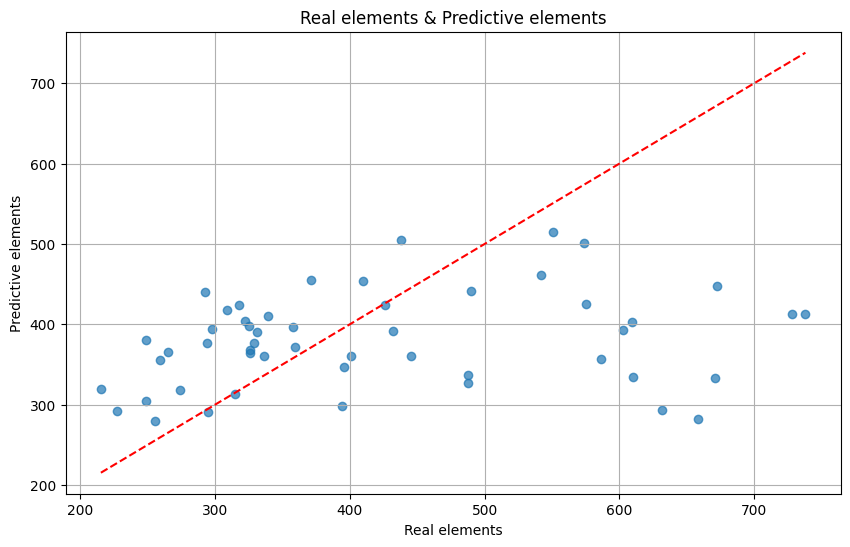

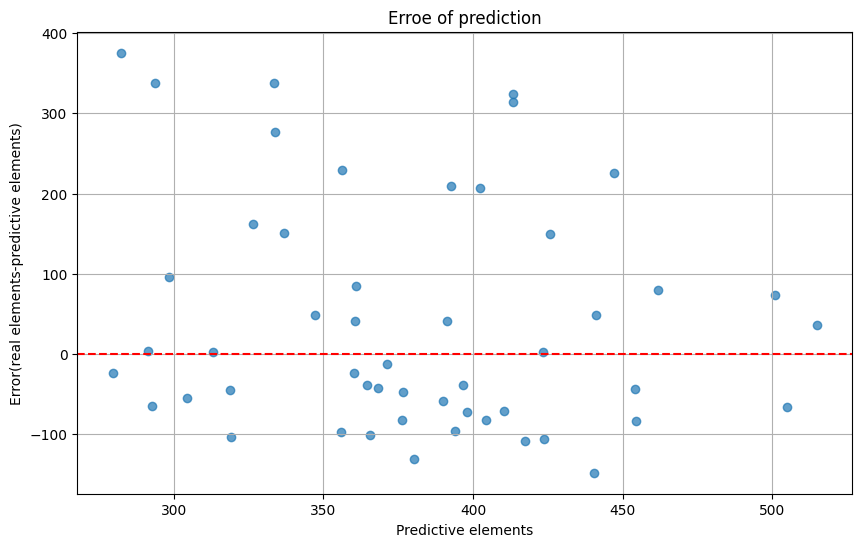

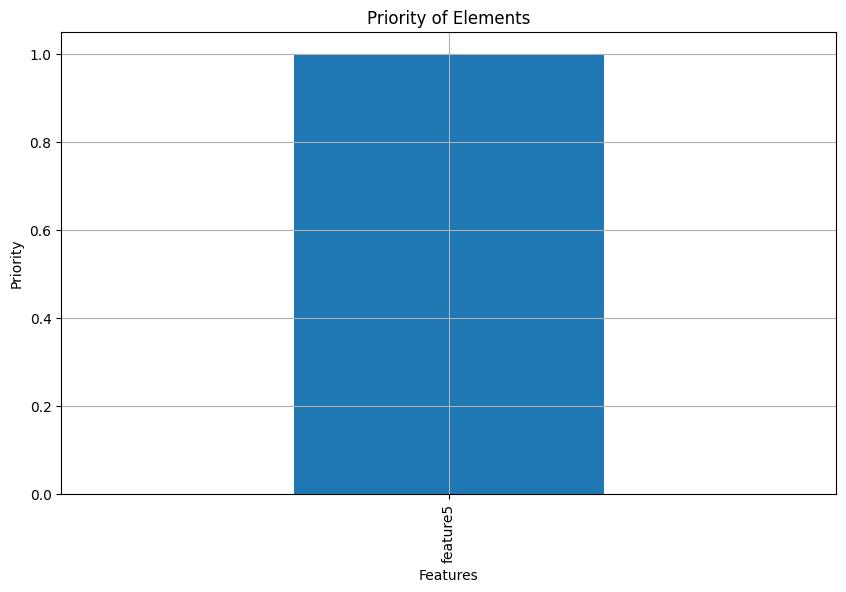

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. نمودار پراکندگی
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # خط ایده‌آل
plt.title('Real elements & Predictive elements')
plt.xlabel('Real elements')
plt.ylabel('Predictive elements')
plt.grid()
plt.show()

# 2. نمودار خطای پیش‌بینی
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # خط صفر
plt.title('Erroe of prediction')
plt.xlabel('Predictive elements')
plt.ylabel('Error(real elements-predictive elements)')
plt.grid()
plt.show()

# 3. نمودار اهمیت ویژگی‌ها
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Priority of Elements')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [important_features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Priority')
plt.grid()
plt.show()

نام ستون‌ها:
Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'target'],
      dtype='object')
پارامترهای مهم:
['feature5']
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

R²: -0.04415884795213576 - مدل موفق است.
Rules of Decesion tree
|--- feature5 <= 0.18
|   |--- feature5 <= 0.17
|   |   |--- feature5 <= -0.09
|   |   |   |--- feature5 <= -0.13
|   |   |   |   |--- value: [333.84]
|   |   |   |--- feature5 >  -0.13
|   |   |   |   |--- value: [276.67]
|   |   |--- feature5 >  -0.09
|   |   |   |--- feature5 <= -0.06
|   |   |   |   |--- feature5 <= -0.06
|   |   |   |   |   |--- feature5 <= -0.08
|   |   |   |   |   |   |--- value: [425.16]
|   |   |   |   |   |--- feature5 >  -0.08
|   |   |   |   |   |   |--- value: [318.19]
|   |   |   |   |--- feature5 >  -0.06
|   |   |   |   |   |--- value: [518.74]
|   |   |   |--- feature5 >  -0.06
|   |   |   |   |--- feature5 <= 0.09
|   |   |   |   |   |--- feature5 <= 0.03
|   |   |   |   |   |   |--- feature5 <= -0.01
|   |   |   |   |   |   |   |--- feature5 <= -0.04
|   |   |   |   |   |   |   |   |--- feature5 <= -0.04
|   |   |   |   |   |   |   |   |   |--- feature5 <= -0.05
|   |   |   |   |   |   |

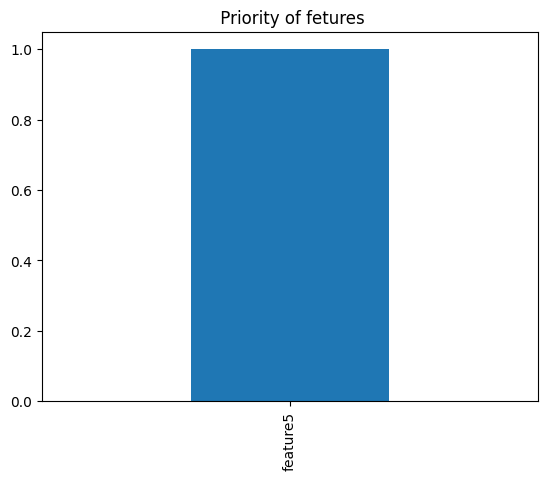

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# مرحله 1: بارگذاری و پاک‌سازی داده‌ها
data = pd.read_csv('/content/my_data10.csv')

# نمایش نام ستون‌ها برای شناسایی ستون هدف
print("نام ستون‌ها:")
print(data.columns)

target_column_name = 'target'  # نام صحیح ستون خروجی را وارد کنید

# حذف ردیف‌های با داده‌های خالی
data_cleaned = data.dropna()

# مرحله 2: محاسبه همبستگی
correlation_matrix = data_cleaned.corr()
target_correlation = correlation_matrix[target_column_name].abs().sort_values(ascending=False)

# انتخاب پارامترهای مهم
important_features = target_correlation[target_correlation > 0.2].index.tolist()  # آستانه 0.2
important_features.remove(target_column_name)

print("پارامترهای مهم:")
print(important_features)

# مرحله 3: تقسیم داده‌ها
X = data_cleaned[important_features]
y = data_cleaned[target_column_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مرحله 4: آموزش مدل Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# بهترین مدل
best_model = grid_search.best_estimator_

# پیش‌بینی و محاسبه R²
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2} - مدل موفق است.')

# مرحله 5: استخراج قوانین درخت تصمیم
# برای استخراج قوانین از درخت‌های تصمیم می‌توانیم از درخت‌های تصمیم موجود در جنگل استفاده کنیم
for tree in best_model.estimators_[:3]:  # فقط سه درخت اول را نمایش می‌دهیم
    from sklearn.tree import export_text
    rules = export_text(tree, feature_names=list(X.columns))
    print("Rules of Decesion tree")
    print(rules)

# مرحله 6: تحلیل اهمیت ویژگی‌ها
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# نمایش اهمیت ویژگی‌ها
plt.figure()
plt.title(" Priority of fetures")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# مرحله 7: ذخیره مدل
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

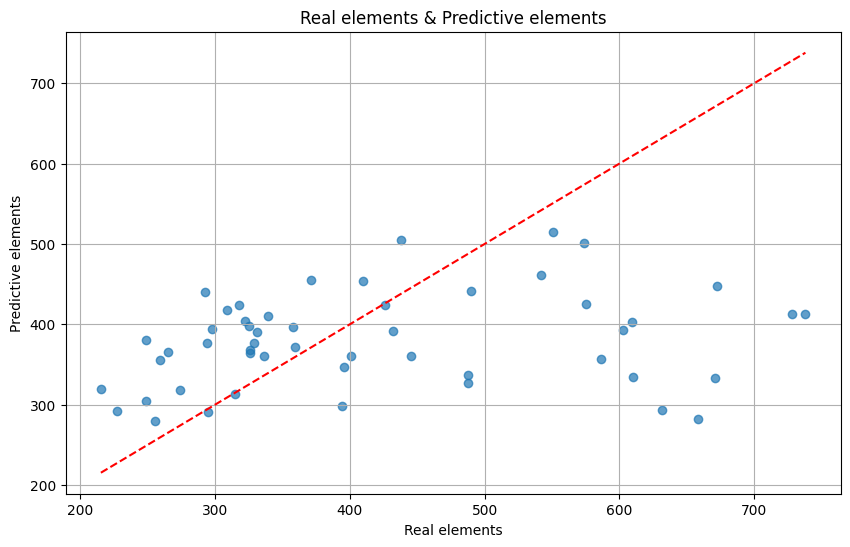

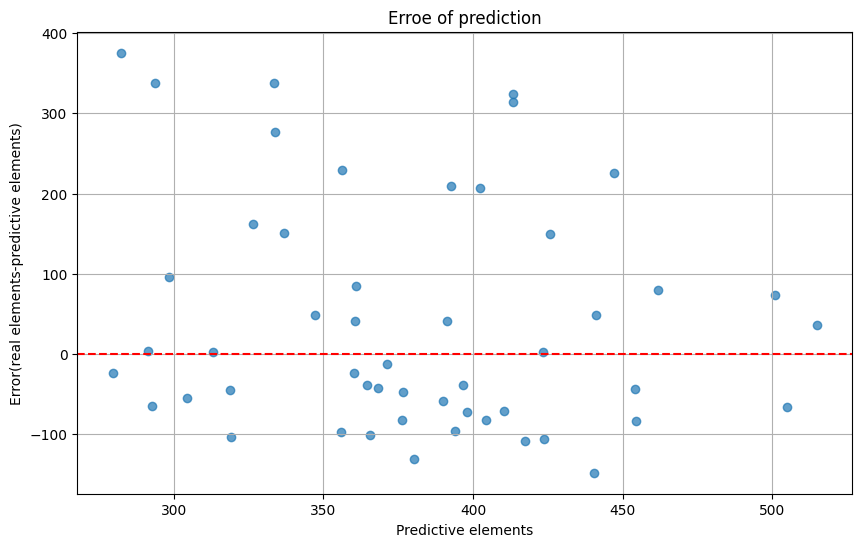

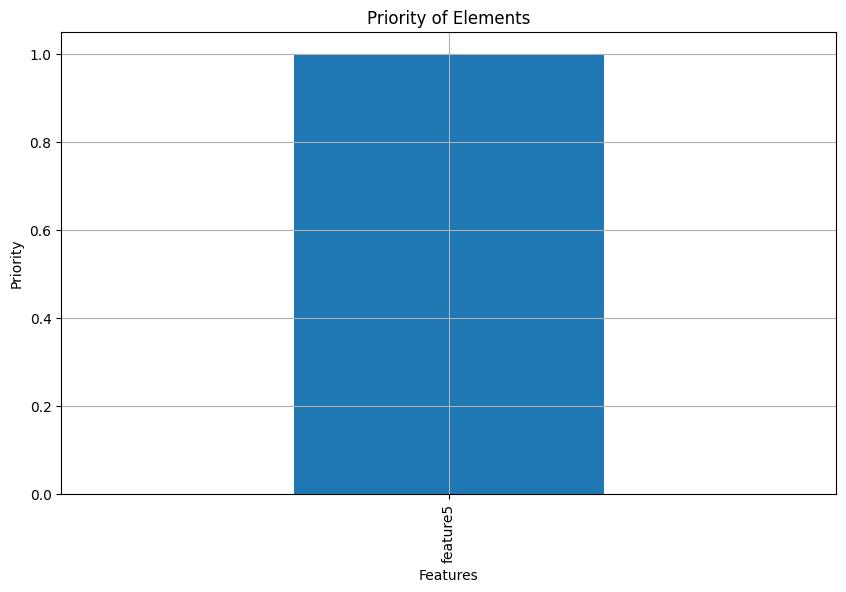

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. نمودار پراکندگی
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # خط ایده‌آل
plt.title('Real elements & Predictive elements')
plt.xlabel('Real elements')
plt.ylabel('Predictive elements')
plt.grid()
plt.show()

# 2. نمودار خطای پیش‌بینی
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # خط صفر
plt.title('Erroe of prediction')
plt.xlabel('Predictive elements')
plt.ylabel('Error(real elements-predictive elements)')
plt.grid()
plt.show()

# 3. نمودار اهمیت ویژگی‌ها
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Priority of Elements')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [important_features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Priority')
plt.grid()
plt.show()